Start at Nov 12, 2023 at 4:00 pm Pacific Time

# In this notebook, we shall see the implementation of fft, ifft, fftshift in the torch.fft module

```torch.fft.fft``` computes the FFT of the input signal, ```torch.fft.ifft``` computes the IFFT, and ```torch.fft.fftshift``` shifts the zero-frequency component to the center of the spectrum. ( The zero-frequency component of the spectrum is the region of the real domain where the function remains constant. This is possible in the region where the function is not defined, thus assumed to be zero. And just before this undefined region starts, the function drops rapidly from define to not define (assumed as zero). Thus, ```fftshift``` seems to shift the peaks from the edges to the centre, and if we want to compute the fourier transform, we must not forget to apply ```fftshift```.)

The relevant signal transforms have been marked with '(RELEVANT)'.


Note that the input to these functions should be in the complex domain. If your signal is purely real, you need to convert it to a complex tensor with zeros in the imaginary part. You can use torch.complex to achieve this

In [ ]:
time = - np.linspace(0, 10, 1000) # let us say our domain is real time
real_signal = torch.tensor( np.exp( time )**2  )
complex_signal = torch.complex(real_signal, torch.zeros_like(real_signal))

In [ ]:
# The input signal (RELEVANT)

import torch
import numpy as np

# Create a sample signal
signal = complex_signal # let us say this is the signal of an electric field in time

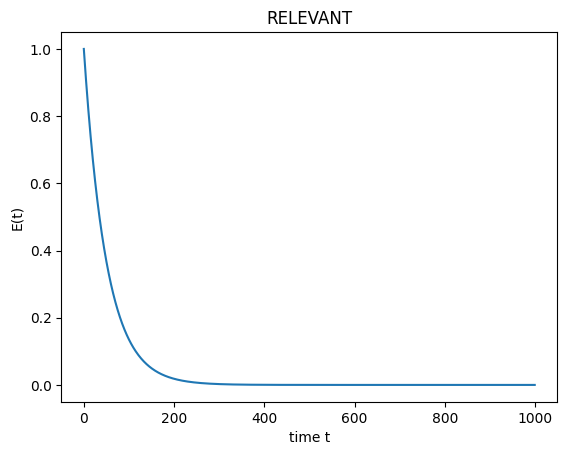

In [ ]:
import matplotlib.pyplot as plt

plt.plot( torch.abs(signal) )
plt.xlabel('time t')
plt.ylabel('E(t)')
plt.title("RELEVANT")
plt.show()

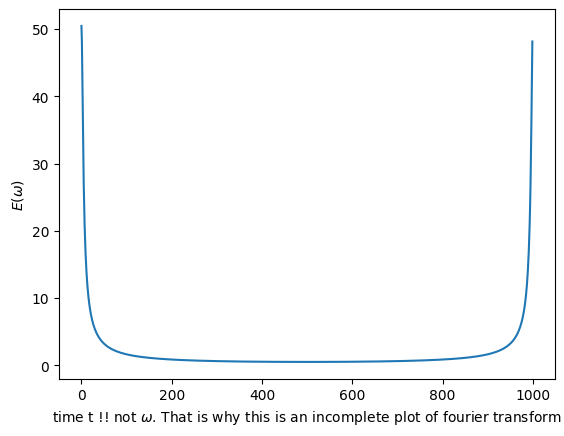

In [ ]:
# FFT
fft_result = torch.fft.fft(signal)

plt.plot(torch.abs(fft_result))
plt.xlabel('frequency $\omega$. But this is an incomplete plot of fourier transform for the reason mentioned at the top')
plt.ylabel('${E}(\omega)$')
plt.show()

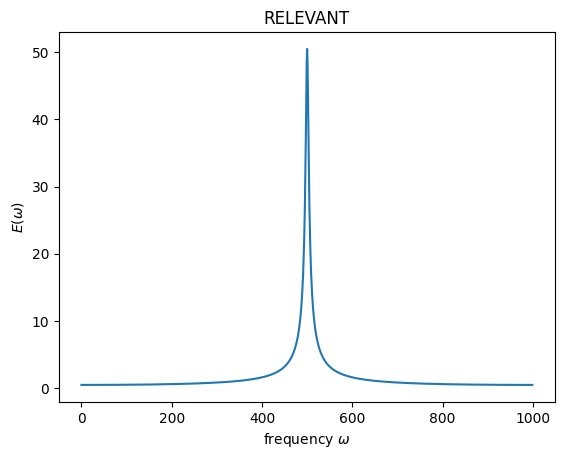

In [ ]:
# FFT shift (RELEVANT)
fft_shifted_result = torch.fft.fftshift(fft_result)

plt.plot(torch.abs(fft_shifted_result))
plt.xlabel('frequency $\omega$')
plt.ylabel('${E}(\omega)$')
plt.title("RELEVANT")
plt.show()

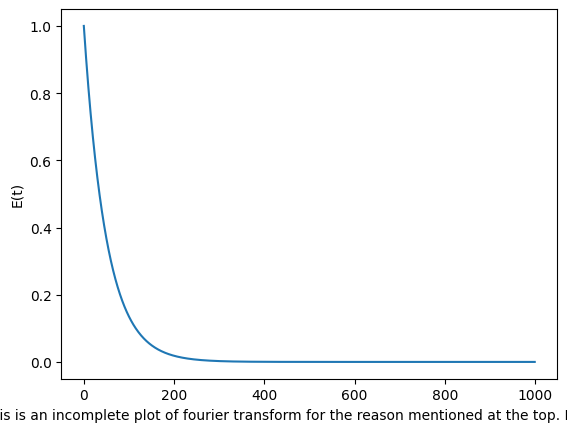

In [ ]:
# IFFT of FFT (RELEVANT)
ifft_result = torch.fft.ifft(fft_result)

plt.plot(torch.abs(ifft_result))
plt.xlabel('time t')
# But this is an incomplete plot of fourier transform for the reason mentioned at the top. It might give errors if
# the input of ifft is not a complete Fourier transform
plt.ylabel('E(t)')
plt.show()

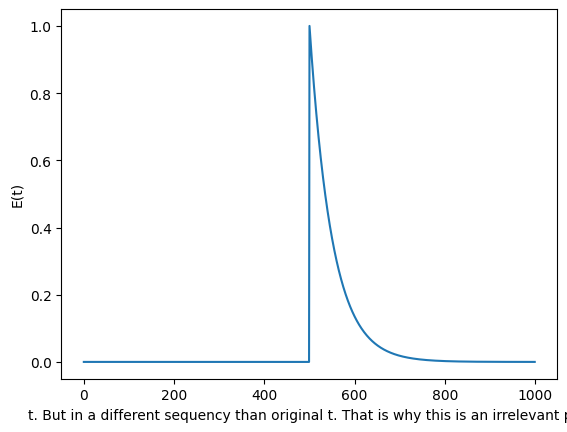

In [ ]:
# IFFT shift of FFT
ifft_shifted_result = torch.fft.fftshift(ifft_result)

plt.plot(torch.abs(ifft_shifted_result))
plt.xlabel('t. But the error associated in the previous plot will propagate. That is why this is an irrelevant plot')
plt.ylabel('E(t)')
plt.show()

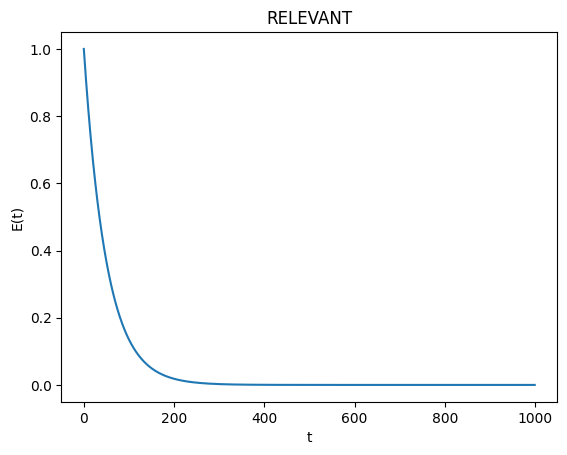

In [ ]:
# IFFT of FFT shift
ifft_fft_shifted_result = torch.fft.ifft( fft_shifted_result )

plt.plot(torch.abs(ifft_fft_shifted_result))
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title("RELEVANT")
# fft_shifted_result represents a complete fourier transform. That is why it is a correct input got ifft
plt.show()

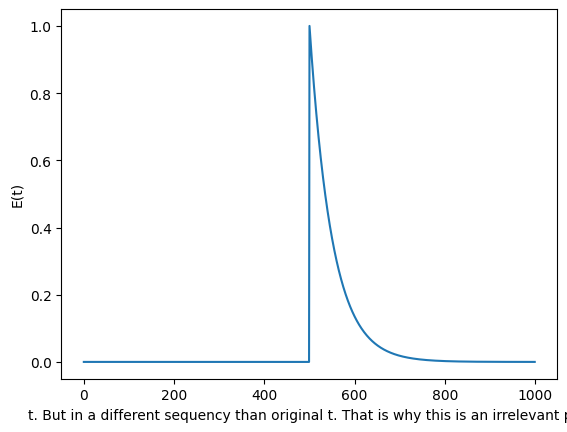

In [ ]:
# IFFT shift of FFT shift
ifft_shifted_fft_shifted_result = torch.fft.fftshift(ifft_fft_shifted_result)

plt.plot(torch.abs(ifft_shifted_result))
plt.xlabel('t. But in a different sequency than original t. That is why this is an irrelevant plot')
plt.ylabel('E(t)')
plt.show()

Now that our study of fft, ifft, fft_shift is done, let us plot the complex phase of the relevant signals using ```torch.angle``` for completeness.

In [ ]:
time = - np.linspace(0, 10, 1000) # let us say our domain is real time
real_signal = torch.tensor( np.exp( time )**2  )
complex_signal = torch.complex(real_signal, torch.zeros_like(real_signal))

In [ ]:
# The input signal (RELEVANT)

import torch
import numpy as np

# Create a sample signal
signal = complex_signal # let us say this is the signal of an electric field in time

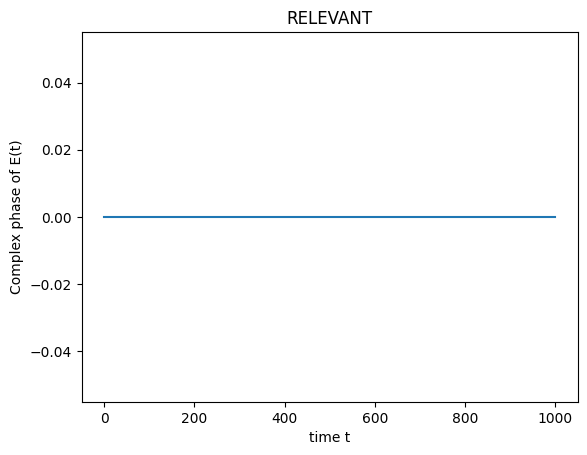

In [ ]:
import matplotlib.pyplot as plt

plt.plot( torch.angle(signal) )
plt.xlabel('time t')
plt.ylabel('Complex phase of E(t)')
plt.title("RELEVANT")
plt.show()

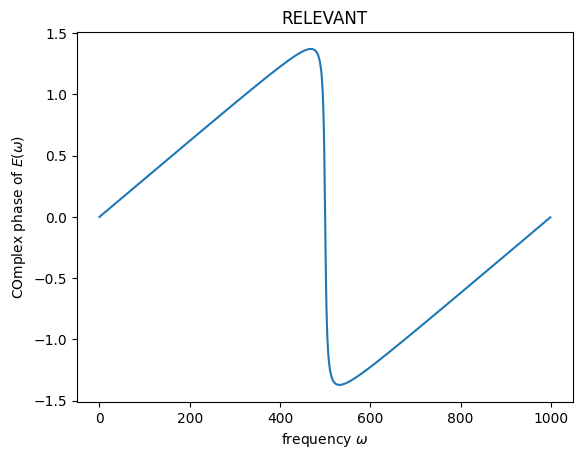

In [ ]:
# FFT shift (RELEVANT)
fft_shifted_result = torch.fft.fftshift(fft_result)

plt.plot(torch.angle(fft_shifted_result))
plt.xlabel('frequency $\omega$')
plt.ylabel('COmplex phase of ${E}(\omega)$')
plt.title("RELEVANT")
plt.show()

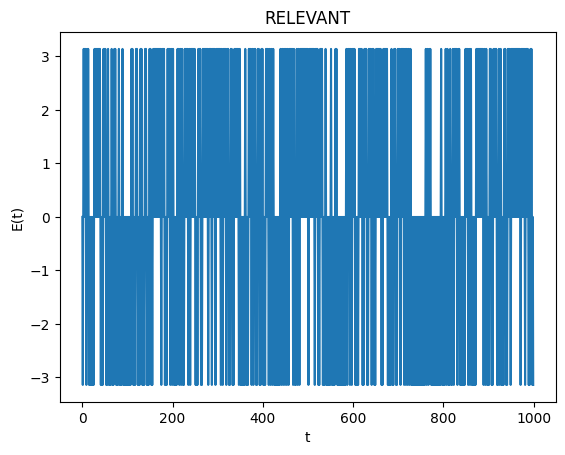

In [ ]:
# IFFT of FFT shift
ifft_fft_shifted_result = torch.fft.ifft( fft_shifted_result )

plt.plot(torch.angle(ifft_fft_shifted_result))
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title("RELEVANT")
# fft_shifted_result represents a complete fourier transform. That is why it is a correct input got ifft
plt.show()

In [ ]:
# Note that the inverse Fourier transform has resulted
# in a complex phase that the input signal did not have!
# Explanation: this error arises because our domain does
# not extend to minus infinity and plus infinity.
# We can truncate this error by enlarging our domain!

Finally, let us write simple functions that help us toggle between the input signal, its Fourier transform, the inverse of the Fourier transform. The output of these functions are 1d tensors in torch.

In [ ]:
# We will use the variable 'time' to denote real space and 'frequency' to denote the Fourier space.

In [ ]:
# A_in_t denotes the signal as a function of time
# A_in_f denotes the signal as a function of frequency

In [1]:
def toggle_time_to_frequency(A_in_t): # function to compute the fourier transform

  import torch
  import numpy as np
  fft_result = torch.fft.fft(signal)
  fft_shifted_result = torch.fft.fftshift(fft_result)

  return fft_shifted_result

def toggle_frequency_to_time(A_in_f):

  import torch
  import numpy as np
  fft_shifted_A_in_f = torch.fft.fftshift(A_in_f) # This ensures that the input is converted to a complete fourier signal
                                                  # if that is not the case already.
  ifft_fft_shifted_result = torch.fft.ifft( fft_shifted_A_in_f )

  return ifft_fft_shifted_result

End at Nov 12, 2023 at 6:10 pm Pacific Time

# Let us test if the recently defined functions toggle_time_to_frequency and toggle_frequency_to_time give the expected results.

In [3]:
import torch
import numpy as np
time = - np.linspace(0, 10, 1000) # let us say our domain is real time
real_signal = torch.tensor( np.exp( time )**2  )
complex_signal = torch.complex(real_signal, torch.zeros_like(real_signal))

In [6]:
# The input signal

# Create a sample signal
time_signal = complex_signal # let us say this is the signal of an electric field in time

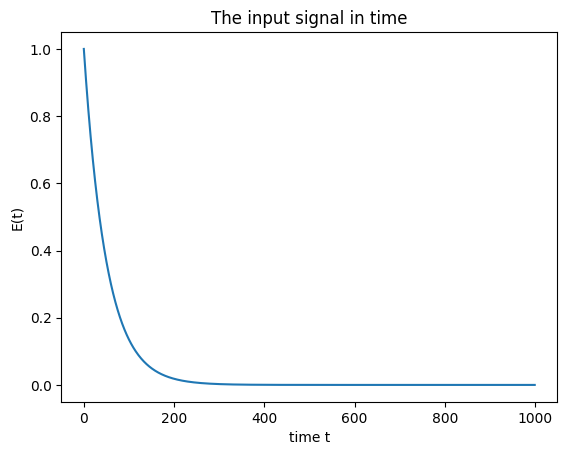

In [7]:
import matplotlib.pyplot as plt

plt.plot( torch.abs(time_signal) )
plt.xlabel('time t')
plt.ylabel('E(t)')
plt.title("The input signal in time")
plt.show()

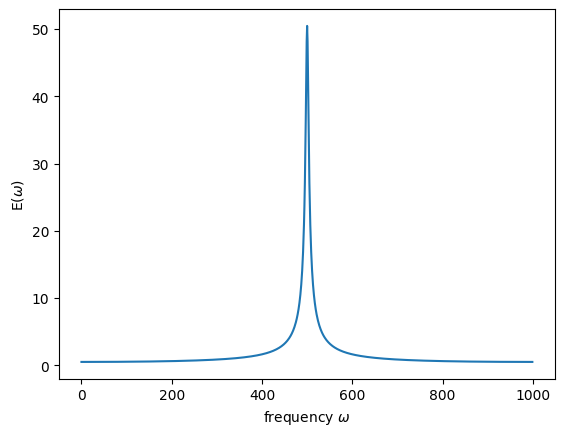

In [14]:
# Testing the toggle_time_to_frequency function

frequency_signal = toggle_time_to_frequency(time_signal)
plt.plot(torch.abs(frequency_signal))
plt.xlabel('frequency $\omega$')
plt.ylabel('E($\omega$)')
plt.show()

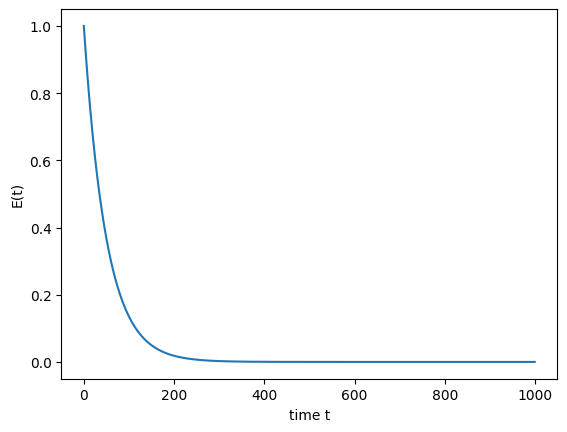

In [13]:
# Testing the toggle_frequency_to_time function

time_signal_new = toggle_frequency_to_time(frequency_signal)
plt.plot(torch.abs(time_signal_new))
plt.xlabel('time t')
plt.ylabel('E(t)')
plt.show()